# Modified Session 5 Notebook

NGC 7469 is a seyfert 1 galaxy. With a central AGN, a circumnuclear starburst ring, a high-velocity outflow, and a dusty, gas-rich interstellar medium (ISM), NGC 7469 is an ideal laboratory for studying the coevolution of galaxies and SMBHs at high resolution with JWST. AGN emits in multi-wavelength and MIR helps us probe the central dusty region near the AGN.

## Spectral Cube

Unlike image that has 2 spatial axis, this has one spectral axis too. It can be in wavelength,frequency or velocity.

![Data Cube schematic.jpg](<attachment:Data Cube schematic.jpg>)
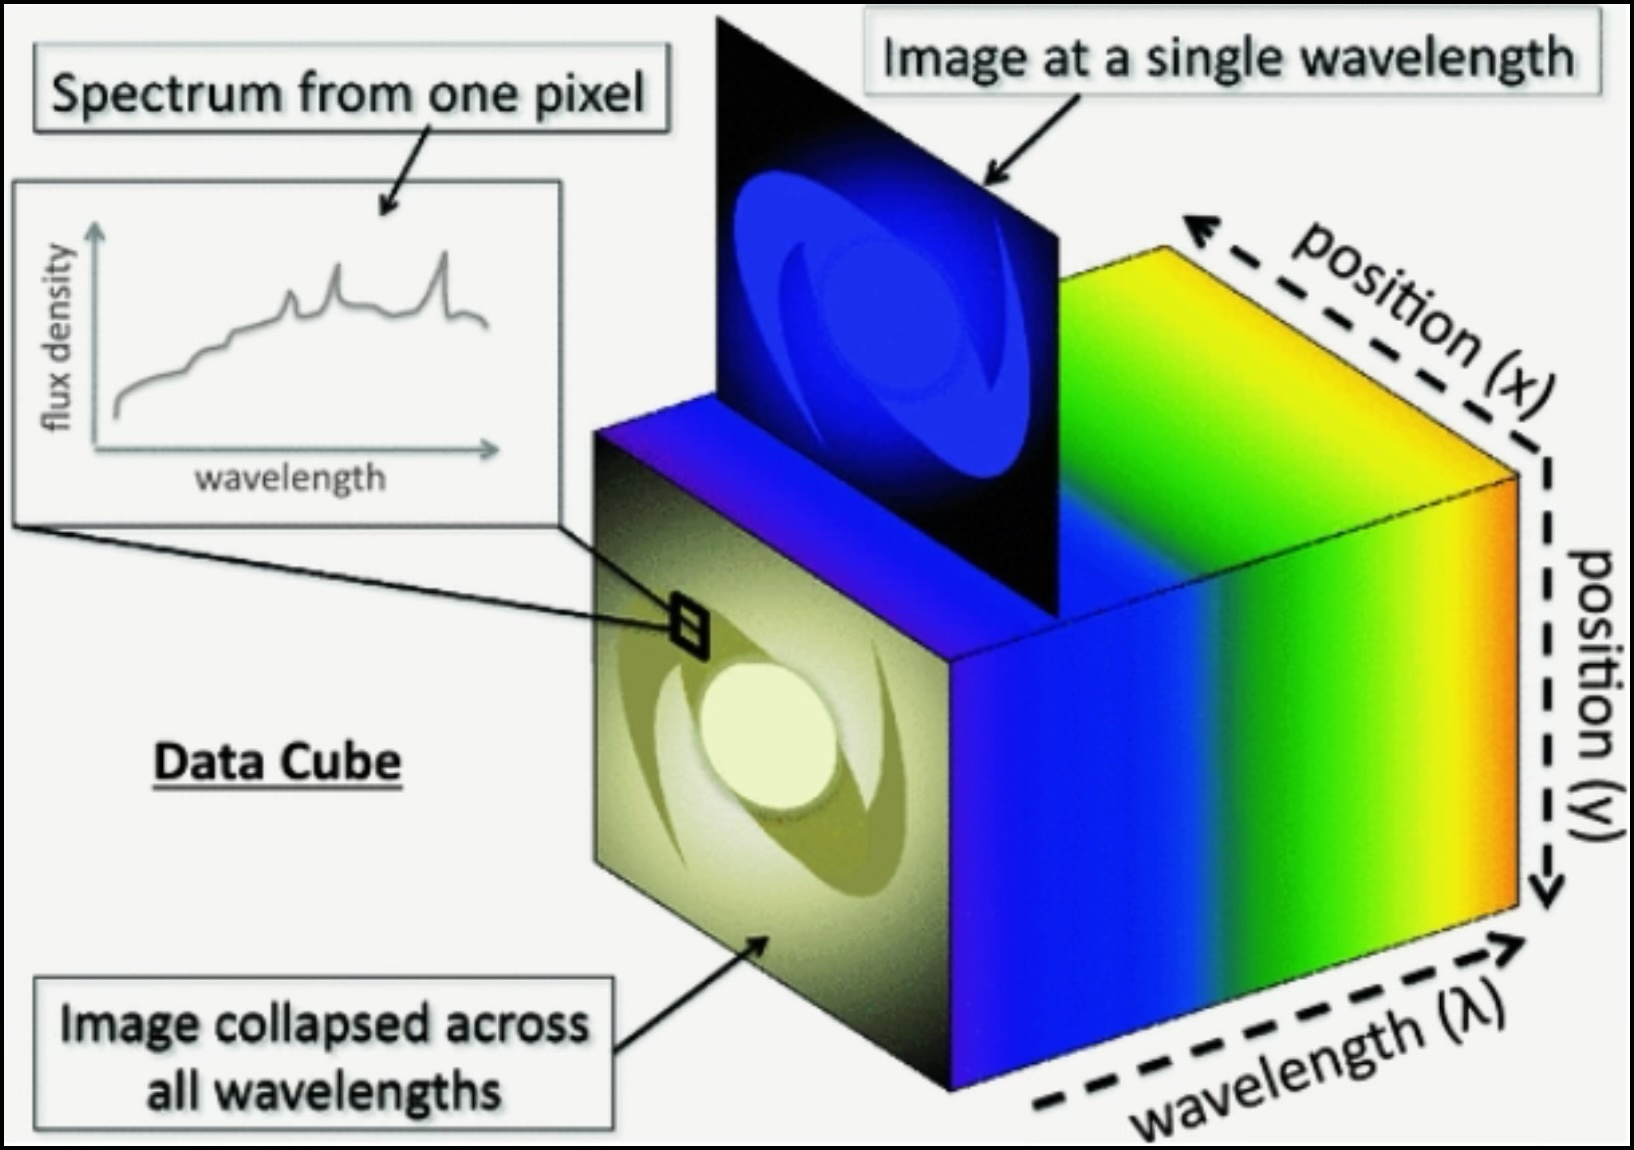

JWST has the following instruments:

1. NIRCam
2. NIRSpec
3. MIRI     --> We will use this today!

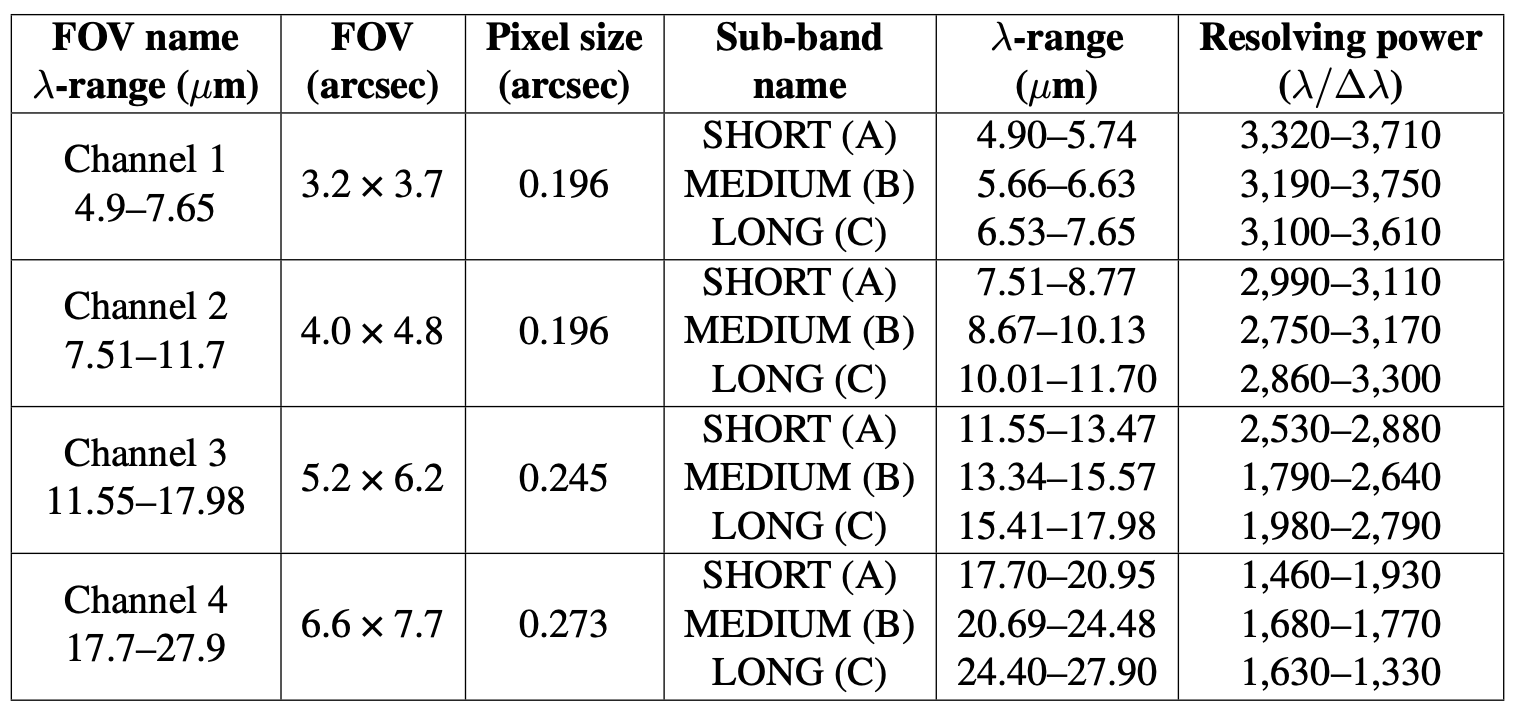

You can read more here: https://jwst-docs.stsci.edu/jwst-mid-infrared-instrument#gsc.tab=0

## How to download the Data?

First go to the MAST portal. Then go to advanced search. There, give the following input:

1. Object Name: NGC 7469
2. Observation Type: science
3. Mission: JWST
4. Instrument: MIRI/IFU
5. Product Type: cube

It will take some time and at top left it will show the records found: 24. There, you click 'search' and it should open it something like as shown below:

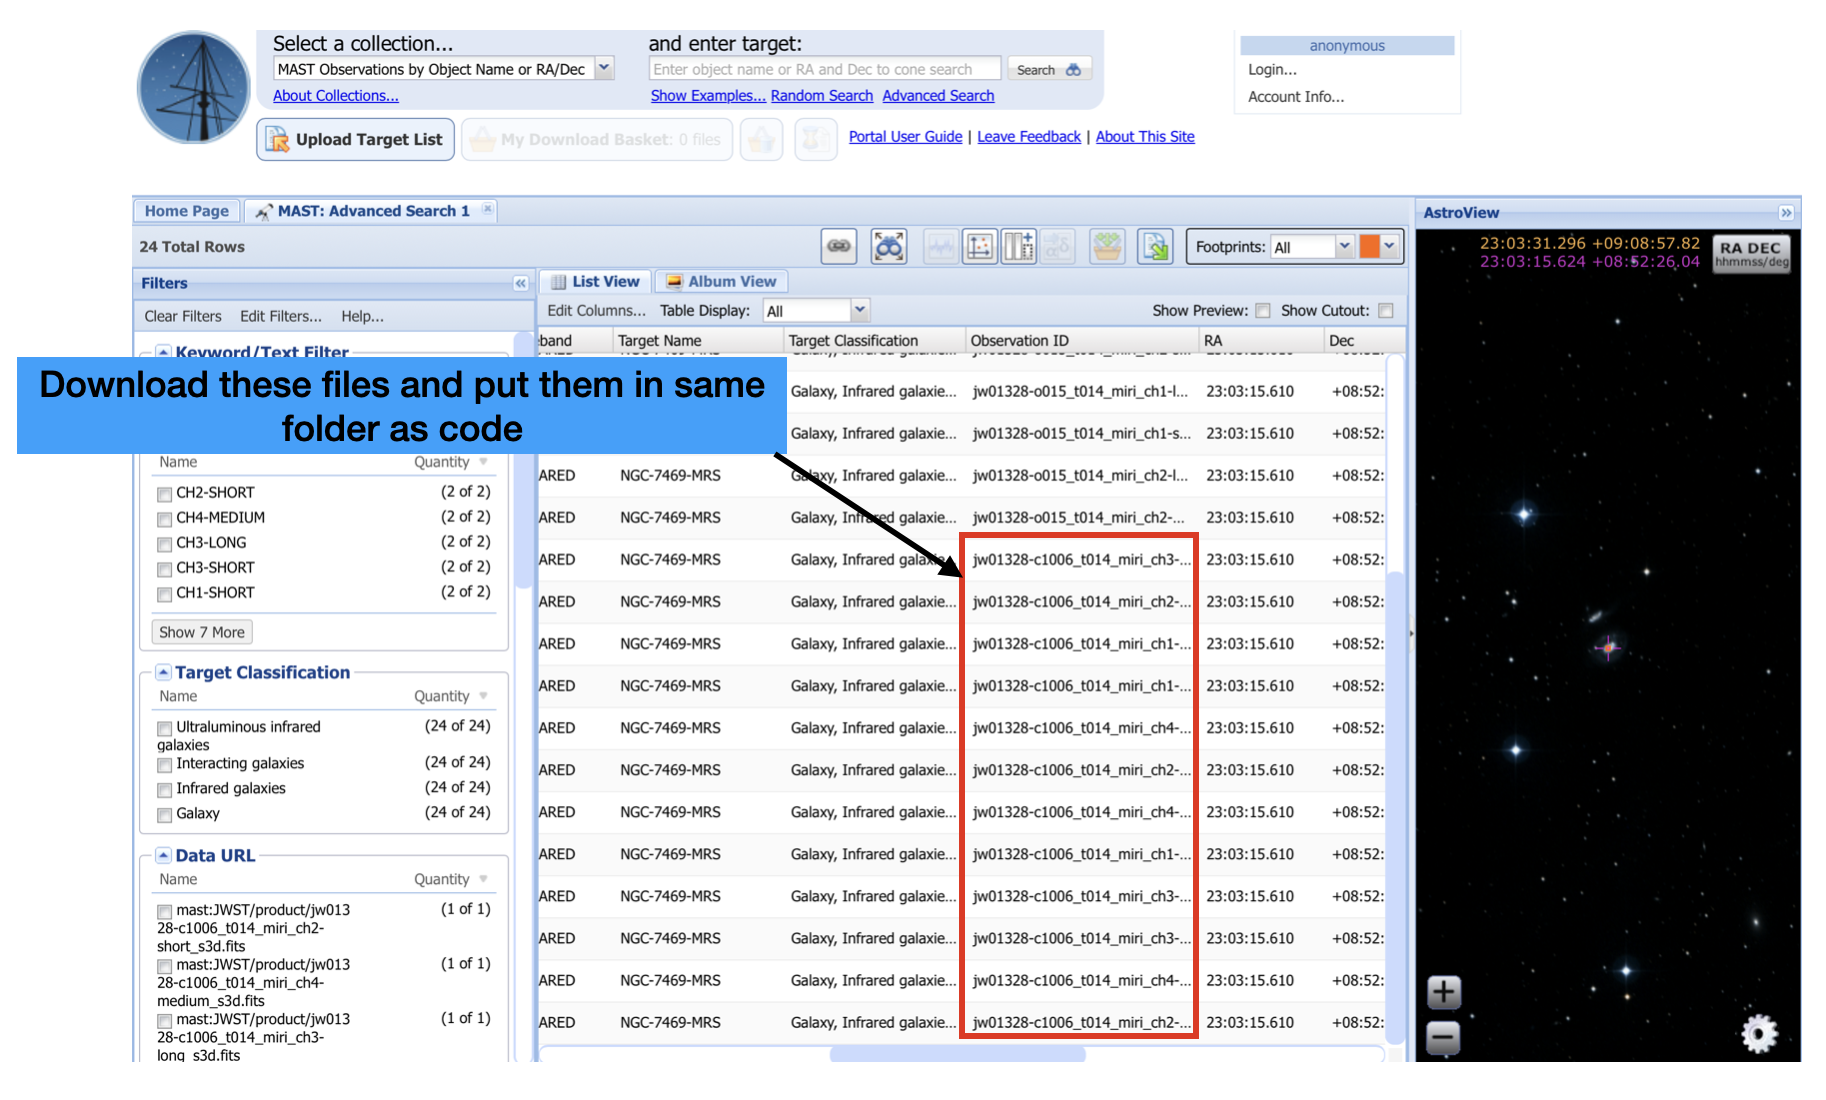

Make sure to download the -c1006 files because that means it is calibrated. These are level 3 files (_x3d.fits) i.e. science ready. Refer to the session 3 (exploring data archive session) to understand how to use MAST portal.

# regions

regions is an in-development coordinated package of Astropy for region handling.

The Regions package provides classes to represent:

    Regions defined using pixel coordinates (e.g., CirclePixelRegion)
    Regions defined using celestial coordinates, but still in an Euclidean geometry (e.g., CircleSkyRegion)
    To transform between sky and pixel regions, a world coordinate system object (e.g., astropy.wcs.WCS) is needed.

Regions also provides a unified interface for reading, writing, parsing, and serializing regions data in different formats, including the DS9 Region Format, CRTF (CASA Region Text Format), and FITS Region Binary Table format.

You can read more about it in here:

https://astropy-regions.readthedocs.io/en/stable/shapes.html

In [1]:
#Region-wise line plotting

# Import necessary libraries
import numpy as np
import warnings
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from regions import Regions

warnings.filterwarnings("ignore", category=UserWarning, append=True)

In [ ]:
# Define the redshift for NGC 7469
# NGC 7469 is a Seyfert galaxy with a redshift of approximately 0.016268
# This value is used to convert observed wavelengths to rest-frame wavelengths
# The redshift value can be obtained from various astronomical databases like NED (NASA/IPAC Extragalactic Database)

z = 0.016268

reg_path = "reg_file_project.reg"  #"region_file.reg" # From DS9 lecture, this is the region file containing the regions of interest
# Read the regions from the DS9 region file
# Make sure to have the regions file in the same directory as this script
regions = Regions.read(reg_path, format='ds9')


file_paths = []

for ch_num in range(1,5):
    for part in ['short','medium','long']:
        # I have kept them in a subfolder MAST_NGC_7469 for clarity
        # You can change the path as per your directory structure        
        file_paths.append(f'./MAST_NGC_7469/jw01328-c1006_t014_miri_ch{ch_num}-{part}_s3d.fits')

print(file_paths)

['./MAST_NGC_7469/jw01328-c1006_t014_miri_ch1-short_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch1-medium_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch1-long_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch2-short_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch2-medium_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch2-long_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch3-short_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch3-medium_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch3-long_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch4-short_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch4-medium_s3d.fits', './MAST_NGC_7469/jw01328-c1006_t014_miri_ch4-long_s3d.fits']


Now we have defined the redshift from NED, made a region file from DS9 and made a list of all the files to iterate over. 

We can proceed further and extract the spectra from each of the file and plot the final spectrum from it.

In the image below I have marked two regions. Get the spectra for both of them and plot the resultant spectra.

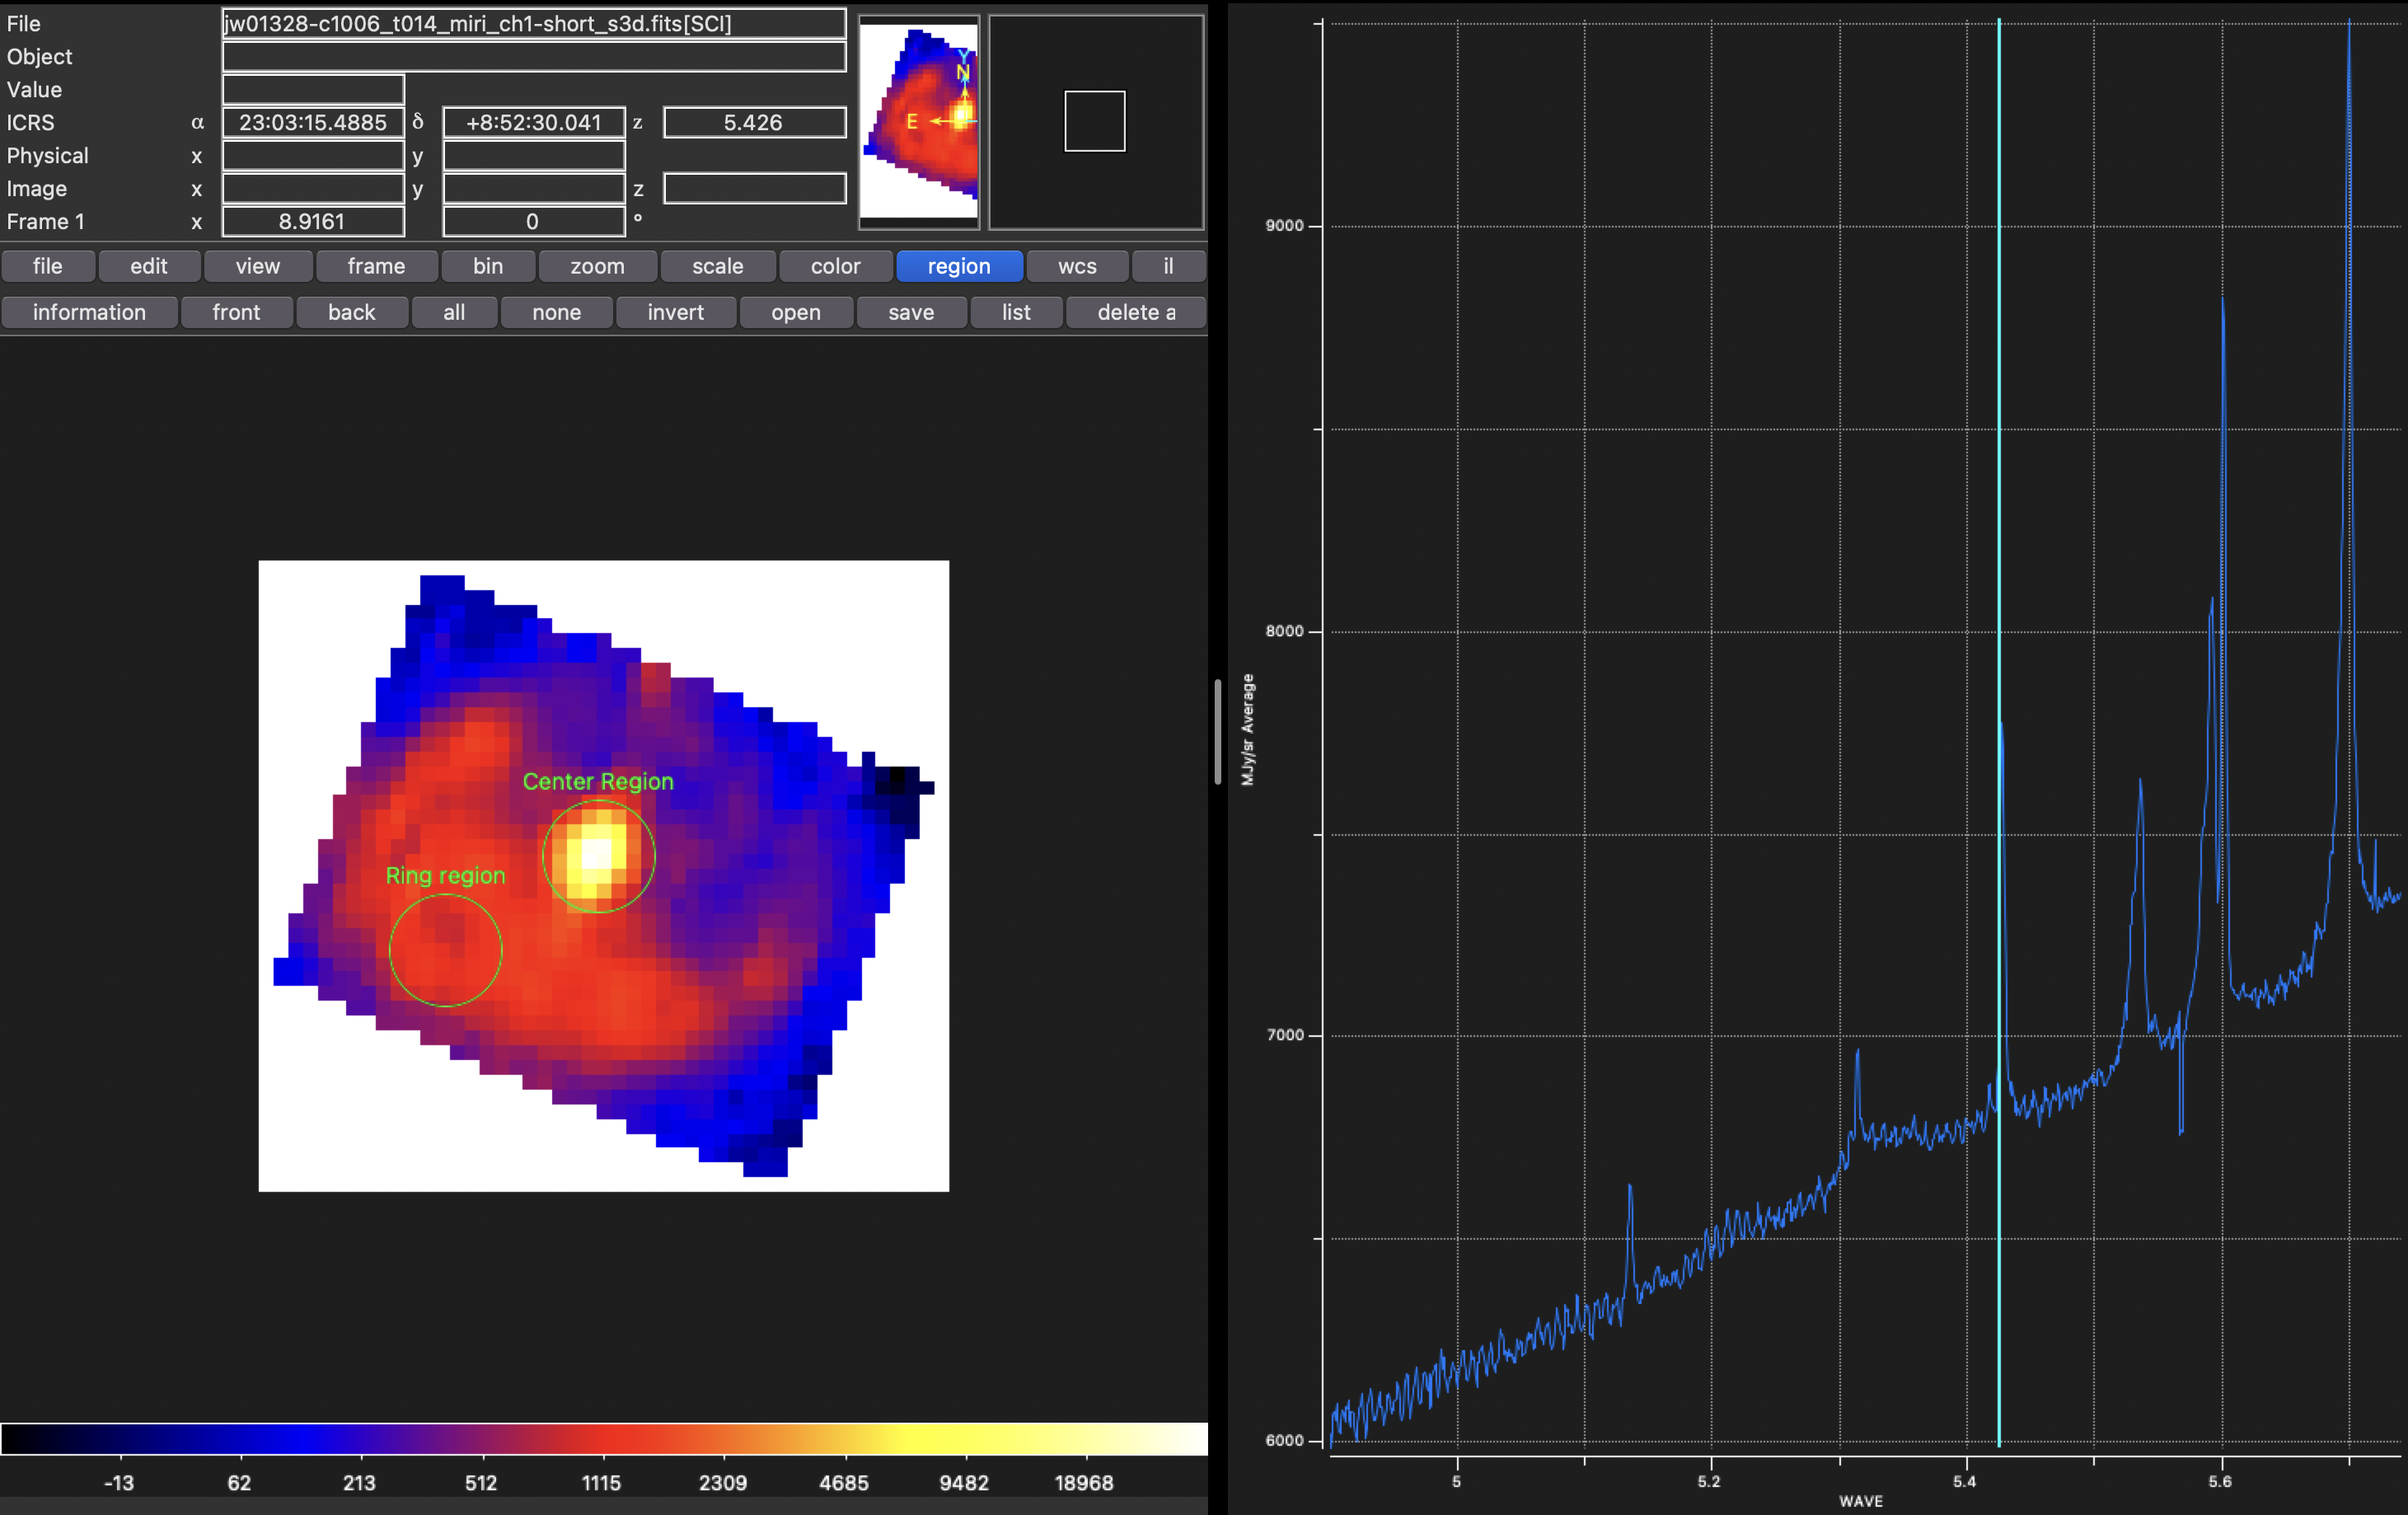

In [11]:
file_titles = [
    'MIRI Channel 1 Short',
    'MIRI Channel 1 Medium',
    'MIRI Channel 1 Long',
    'MIRI Channel 2 Short',
    'MIRI Channel 2 Medium',
    'MIRI Channel 2 Long',
    'MIRI Channel 3 Short',
    'MIRI Channel 3 Medium',
    'MIRI Channel 3 Long',
    'MIRI Channel 4 Short',
    'MIRI Channel 4 Medium',
    'MIRI Channel 4 Long'
]

# Calculating physical size of each pixel in pc
Distance = 70.6 # Mpc, distance to NGC 7469
print("Pixel size in pc of each file:")
for channel_index, file_path in enumerate(file_paths):
    # Open the FITS file
    with fits.open(file_path) as hdul:
        header = hdul[1].header
        delta1 = header['CDELT1']  # Pixel size in degrees
        delta1 = np.abs(delta1)*3600  # Ensure positive value & convert to arcseconds
        delta1_AU = delta1 * Distance * 1e6  # Convert arcseconds to AU
        delta1_pc = delta1_AU / 206265  # Convert AU to parsecs or use astropy's units
        print(f"{file_titles[channel_index]}     : {delta1_pc:.2f} pc")


Pixel size in pc of each file:
MIRI Channel 1 Short     : 44.50 pc
MIRI Channel 1 Medium     : 44.50 pc
MIRI Channel 1 Long     : 44.50 pc
MIRI Channel 2 Short     : 58.19 pc
MIRI Channel 2 Medium     : 58.19 pc
MIRI Channel 2 Long     : 58.19 pc
MIRI Channel 3 Short     : 68.46 pc
MIRI Channel 3 Medium     : 68.46 pc
MIRI Channel 3 Long     : 68.46 pc
MIRI Channel 4 Short     : 119.80 pc
MIRI Channel 4 Medium     : 119.80 pc
MIRI Channel 4 Long     : 119.80 pc


## Extracting the Spectra

In [3]:
# Define lists to store the spectrum and wavelength for all regions
spectrum_all_regions = []
spectrum_all_regions_err = []
wavelength_all_regions = []
# This will store the spectrum and wavelength for all regions across all channels
# This allows us to plot the spectrum for all regions in one go
# This is useful for comparing the spectra of different regions 



# Loop over each region
for region in regions:  # For now we are only considering one region. In your project you can loop over all regions
    
    # Initialize lists to store the spectrum and wavelength for all channels

    spectrum_all = []
    spectrum_all_err = []
    wavelength_all = []

    for channel_index, file_path in enumerate(file_paths, start=1):
        
        # Initialize empty lists to store the spectrum and wavelength for this channel
        # This is done to store the spectrum and wavelength for each channel separately
        # This allows us to combine the spectra from all channels later
        spectrum = []
        spectrum_err = []

        # Get the mask for the region
        data = fits.open(file_path)[1].data       # 1 contain the 3D data cube
        data[data < 0] = np.nan
        data_err = fits.open(file_path)[2].data   # 2 contain the error cube

        # Open the FITS file and get the WCS information to make mask of the region
        # Mask means the region of interest in the image - other parts are ignored
        header = fits.open(file_path)[1].header
        wcs = WCS(header)
        mask = region.to_pixel(wcs.celestial).to_mask()  # Convert the region from celestial to pixel coordinates then make a mask
        # Get the shape of the data
        num_channels, ny, nx = data.shape

        # Loop over each channel (wavelength)
        for i in range(num_channels):
            # Extract the 2D image for the current channel
            masked_data = np.array(mask.multiply(data[i, :, :]), dtype=float)
            masked_data_err = np.array(mask.multiply(data_err[i, :, :]), dtype=float)

            avg_intensity = np.nanmean(masked_data)
            avg_intensity_err = np.sqrt(np.nanmean(masked_data_err**2))

            # Handle case where all values are NaN. To avoid RuntimeWarning: Mean of empty slice
            if np.isnan(avg_intensity):
                avg_intensity = 0
            if np.isnan(avg_intensity_err):
                avg_intensity_err = 0

            spectrum.append(avg_intensity)
            spectrum_err.append(avg_intensity_err)

        # Set up the wavelength axis
        n_wavelengths = data.shape[0]  # Number of wavelengths in the channel

        # Extract the WCS information from the header to get the wavelength values
        # CRVAL3, CDELT3, and CRPIX3 are WCS keywords that define the wavelength axis
    
        crval3 = header['CRVAL3']   # CRVAL3 is the reference value of the wavelength axis
        cdelt3 = header['CDELT3']   # CDELT3 is the increment in the wavelength axis
        crpix3 = header['CRPIX3']   # CRPIX3 is the reference pixel of the wavelength axis

        wavelength = (np.arange(n_wavelengths) - (crpix3 - 1)) * cdelt3 + crval3
        wavelength = wavelength / (1 + z) # Convert to rest-frame wavelength
        
        # Append the results for this channel to the overall lists
        # This is done to combine the spectra from all channels into one list
        # This allows us to plot the spectrum across all channels in one go
        # The wavelength and spectrum lists will have the same length
        
        wavelength_all.extend(wavelength)
        spectrum_all.extend(spectrum)
        spectrum_all_err.extend(spectrum_err)

        # Now you can add it to a dataframe/numpy file (.npy file) too.
    
    # Append the results for this region to the overall lists
    spectrum_all_regions.append(spectrum_all)
    spectrum_all_regions_err.append(spectrum_all_err)
    wavelength_all_regions.append(wavelength_all)


Set DATE-AVG to '2022-07-04T03:54:53.948' from MJD-AVG.
Set DATE-END to '2022-07-04T04:01:02.328' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.282938 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737445736.637 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T04:11:31.595' from MJD-AVG.
Set DATE-END to '2022-07-04T04:17:33.047' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.283459 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737461184.326 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T04:28:21.738' from MJD-AVG.
Set DATE-END to '2022-07-04T04:34:17.654' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.283980 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737476718.880 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T03:54:53.948' from MJD-AVG.
Set DATE-END to '2022-07-04T04:01:02.328' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.282938 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737445736.637 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

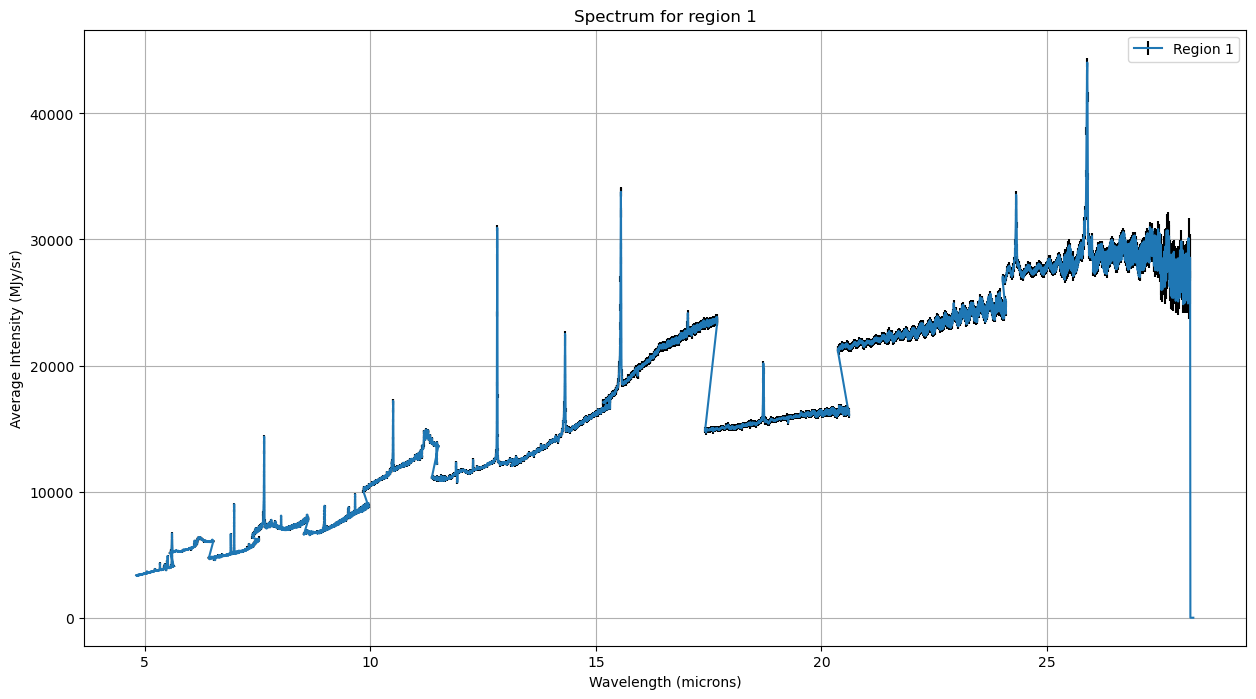

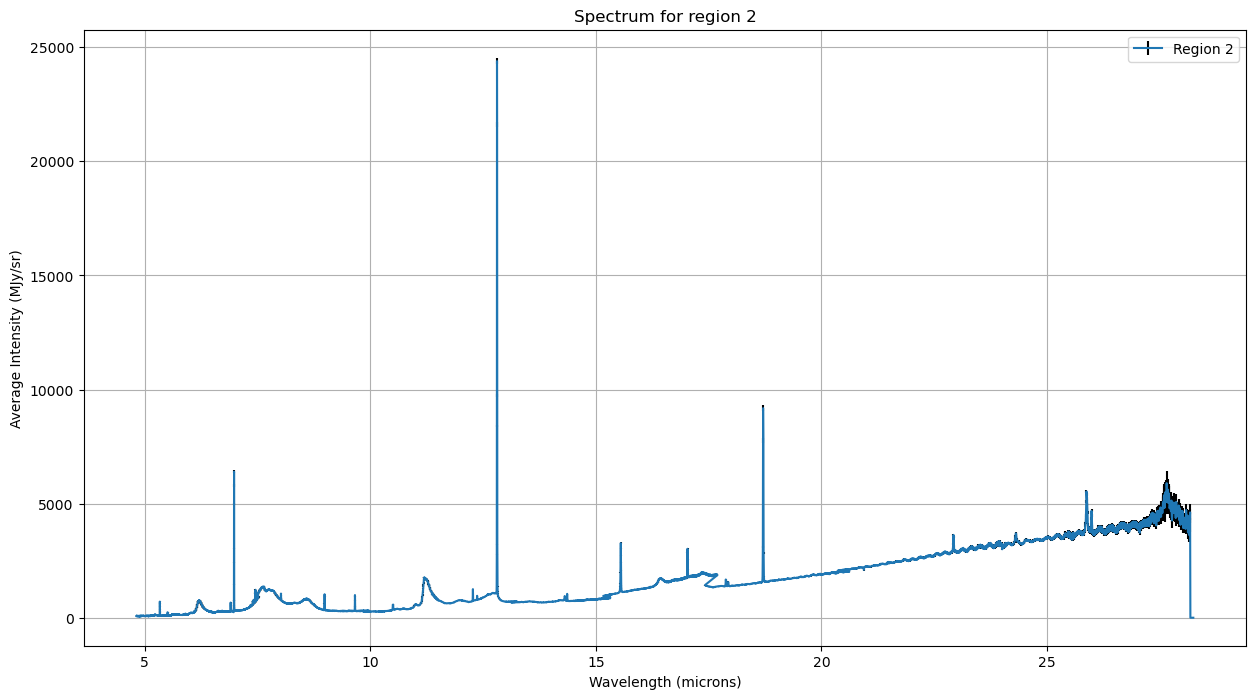

In [4]:

for i, region in enumerate(regions):
    # Plot the spectrum for each region
    # This will plot the spectrum for each region in a separate plot
    plt.figure(figsize=(15, 8))
    plt.errorbar(wavelength_all_regions[i], spectrum_all_regions[i], yerr=spectrum_all_regions_err[i], label=f'Region {i+1}', ecolor='black')
    plt.xlabel('Wavelength (microns)')
    plt.ylabel('Average Intensity (MJy/sr)')
    plt.title(f'Spectrum for region {i+1}')
  
    # Change the x-axis limits to focus on the desired region
    # w_start, w_end = 8.95, 9.05
    # plt.xlim(w_start, w_end)

    # Auto-scale y-axis to the visible range
    # plt.ylim(0, 1.1*np.nanmax(spectrum_all[(wavelength_all >= w_start) & (wavelength_all <= w_end)]))
    plt.grid(True)
    plt.legend()
    plt.show()

You can clearly see the difference between the two regions. Ignore the shift in each spectra from the channels which is due to instrumental reason, it needs some additional correction. Channel 4 is quite noisy in nature as the detector reaches its limit, especially after 26-27 micron.

Make a table of all the identified lines in both regions. And try explaining their astrophysical significance. I have identified and marked the key lines below.

In [ ]:
# %pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 3.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


The code below is to plot and interactively view the final spectra. It might be complex so you can treat it as a black box or explore on your own.

Your task here is to fill the spectral features by opening each file in cubeviz. I will give you an example walkthrough.

In [7]:
import plotly.graph_objects as go
import numpy as np

# Define all spectral features with different categories (Since this is common for all regions, I have moved it outside the loop)
features = {
    'PAHs': {
        'PAH 6.2': 6.2, 'PAH 7.7': 7.7, 'PAH 8.6': 8.6,
        'PAH 11.3': 11.3, 'PAH 12.7': 12.7, 'PAH 16.5': 16.5, 'PAH 17.4': 17.4,
    },
    'Iron': {
        '[Fe II] a4F9/2-a6D9/2': 5.34, '[Fe II] a4F7/2-a4F9/2': 17.936, 
        '[Fe III] 5D3-5D4': 22.925
    },
    'Neon': {
        '[Ne II]': 12.8135, '[Ne III]': 15.56,'[Ne V] 14': 14.32,
        '[Ne V] 24': 24.32, '[Ne VI]': 7.65,
    },
    'Other': {
        '[Ar II]': 6.985, '[Ar III]': 8.991, '[S III]': 18.713,
        '[S IV]': 10.51, '[Mg VII]': 5.503, '[O III]': 8.59,
        '[O IV]': 25.89, '[P III]': 17.8846
    },
    'H₂': {
        'S(1)': 17.035, 'S(2)': 12.279, 
        'S(3)': 9.664, 'S(4)': 8.025, 
        'S(5)': 6.909, 'S(6)': 6.108, 
        'S(7)': 5.511, 'S(8)': 5.052
    }
}

# Add all features with different colors and styles
colors = {
    'PAHs': '#FF7F0E',  # Orange
    'Iron': '#2CA02C',  # Green
    'Neon': '#D62728',  # Red
    'Other': '#9467BD',  # Purple
    'H₂': '#8C564B'     # Brown
}

for i, region in enumerate(regions):
    # Initialize figure with custom size
    fig = go.Figure(layout=dict(
        width=1200,  # Width in pixels
        height=700,  # Height in pixels
        template='plotly_white'
    ))

    # Extract the spectrum and wavelength for the current region
    # This is done to plot the spectrum for each region separately
    wavelength_all,spectrum_all,spectrum_all_err = np.array(wavelength_all_regions[i]), np.array(spectrum_all_regions[i]), np.array(spectrum_all_regions_err[i])

    # Add spectrum trace
    fig.add_trace(go.Scatter(
        x=wavelength_all,
        y=spectrum_all,
        mode='lines',
        line=dict(color='#1f77b4', width=1.5),
        name='Spectrum',
        hovertemplate='λ: %{x:.3f} μm<br>Intensity: %{y:.2f} MJy/sr<extra></extra>'
    ))

    # Add error band
    fig.add_trace(go.Scatter(
        x=np.concatenate([wavelength_all, wavelength_all[::-1]]),
        y=np.concatenate([spectrum_all + spectrum_all_err, 
                        (spectrum_all - spectrum_all_err)[::-1]]),
        fill='toself',
        fillcolor='rgba(31, 119, 180, 0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        name='Uncertainty'
    ))

    # Add vertical lines and annotations
    for category, lines in features.items():
        for name, wl in lines.items():
            fig.add_vline(
                x=wl,
                line=dict(
                    color=colors[category],
                    width=1.5 if category == 'PAHs' else 1,
                    dash='dot' if category != 'PAHs' else 'solid'
                ),
                annotation=dict(
                    text=name,
                    yanchor='bottom',
                    font=dict(
                        size=10,
                        color=colors[category]
                    ),
                    yshift=10 if category == 'PAHs' else 0
                )
            )

    # Highlight PAH bands with shaded regions
    for wl in [6.2, 7.7, 8.6, 11.3, 12.7, 16.5, 17.4]:
        fig.add_vrect(
            x0=wl-0.15, x1=wl+0.15,
            fillcolor=colors['PAHs'],
            opacity=0.1,
            line_width=0
        )

    # Customize layout
    fig.update_layout(
        title=f'<b>NGC 7469 JWST/MIRI IFU Spectrum with Molecular and Atomic Features for Region {i+1}</b>',
        xaxis_title='<b>Wavelength (μm)</b>',
        yaxis_title='<b>Intensity (MJy/sr)</b>',
        hovermode='x unified',
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        margin=dict(l=50, r=50, b=50, t=80),
    )
    # Show the figure for the current region
    fig.show()

You can see that the central region has much stronger [Ne III], [Ne V] and [Ne VI] lines compared to the [Ne II]. But the ring region has much stronger
[Ne II] line respectively because it is a tracer of star formation (SF) whereas the other lines are tracer of AGN. Since you can only reach that much ionization in very highly energetic environment (especially [Ne V] and [Ne VI], [Ne III] is intermediate line between SF & AGN ).

The PAH features seen in the MIR arise from different types of vibrational modes within the molecules. The features at 6.2 and 7.7 µm are mainly due to carbon–carbon (C–C) stretching, while the 8.6 µm feature comes from carbon–hydrogen (C–H) in-plane bending, which tends to be stronger in ionized PAH
molecules. On the other hand, the 11.3 µm feature, produced by C–H out-of-plane bending, is typically more prominent in neutral PAHs. PAH 7.7/11.3 is a good diagnostic, you can see that PAH 7.7 is almost negligible in the first panel. So the ratio is very less compared to second because they get preferentially destroyed in AGN compared to star formation.

[S IV]/[S III] line ratio, specifically the ratio of [S IV] 10.5µm to [S III] 18µm emission lines, is a diagnostic tool that can provide insights into the ionization state and conditions of the gas within the Narrow-Line Region (NLR).